In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# create data frames to read data set
df = pd.read_csv('gld_price_data.csv')

In [4]:
df.head() #start 5 drows of dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.tail() # end 5 row of dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#find no of rows and colums
df.shape

(2290, 6)

In [8]:
# statical measures insights of data
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Remove missing values if any
df.dropna()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [10]:

# Verify dataset after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


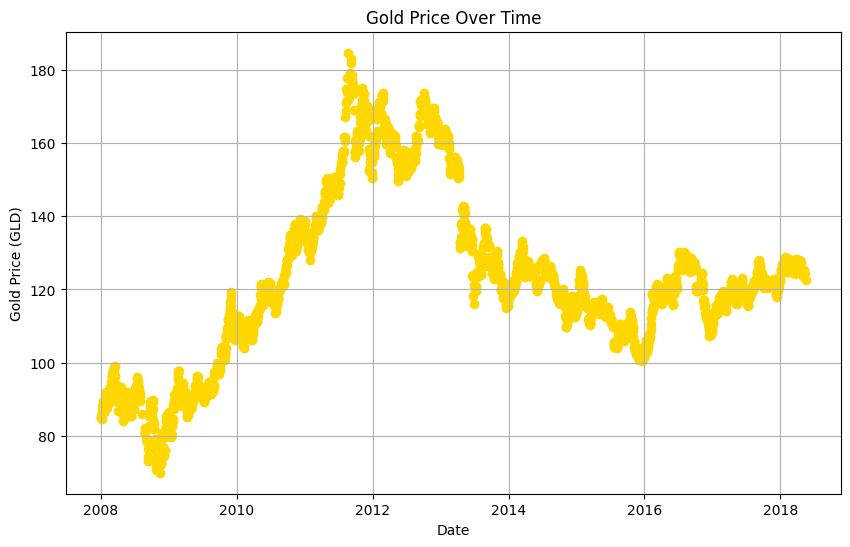

In [11]:
# Ensure date is in the correct format (if applicable)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df= df.sort_values('Date')

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['GLD'], color='gold', marker='o')
plt.title("Gold Price Over Time")
plt.xlabel("Date")
plt.ylabel("Gold Price (GLD)")
plt.grid(True)
plt.show()


In [12]:
# describe df numerical columns : statical measures insights of data
df.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


In [13]:
# find the unique values from categorical features
for col in df.select_dtypes(include=['object']):
  print(col,df[col].unique())

In [14]:
# find Missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for features in features_na:
  print(features,np.round(df[features].isnull().mean(),4), ' % missing values')
else:
  print('no missing values')

no missing values


In [15]:
for column in df.columns:
  print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [16]:
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
categorical_features

[]

In [17]:
for feature in categorical_features:
  print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

In [18]:
# List of numerical data
numerical_features = [features for features in df.columns if ((df[features].dtype != 'O') & (features not in ['GLD']))]
print('Number of numerical variables:', len(numerical_features))


Number of numerical variables: 5


In [19]:
# List of numerical data
numerical_features = [features for features in df.columns if (df[features].dtype != 'O') and (features not in ['GLD'])]
print('Number of numerical variables:', len(numerical_features))


Number of numerical variables: 5


In [20]:
numerical_features = [features for features in df.columns if ((df[features].dtype != 'O') & (features not in ['GLD']))]


In [21]:

# List of numerical data
numerical_features = [features for features in df.columns if ((df[features].dtype != 'O') & (features not in ['GLD']))]
print('Number of numerical variables:', len(numerical_features))


Number of numerical variables: 5


In [22]:
discreate_features = [features for features in numerical_features if len(df[features].unique()) < 25]
print('number of discreate variables: ',len(discreate_features))

number of discreate variables:  0


In [23]:
continious_features = [features for features in numerical_features if features not in discreate_features]
print('number of continious variables: ',len(continious_features))

number of continious variables:  5


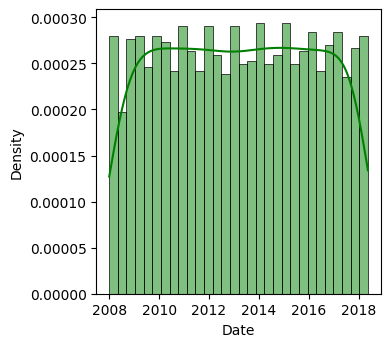

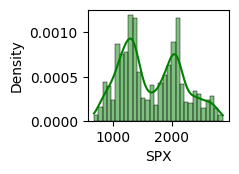

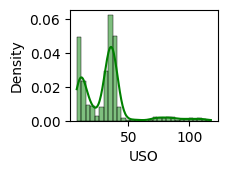

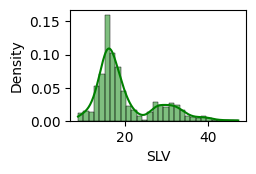

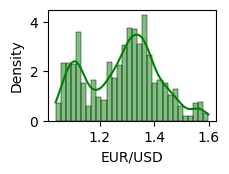

In [24]:
# plot a univariate distribution of continious observation
plt.figure(figsize=(10,10))
for i,features in enumerate(continious_features):
  plt.subplot(3,3,i+1)
  sns.histplot(df[features], bins=30, kde=True, color='green', edgecolor='black', stat='density')
  plt.xlabel(features)
  plt.tight_layout()
  plt.show()

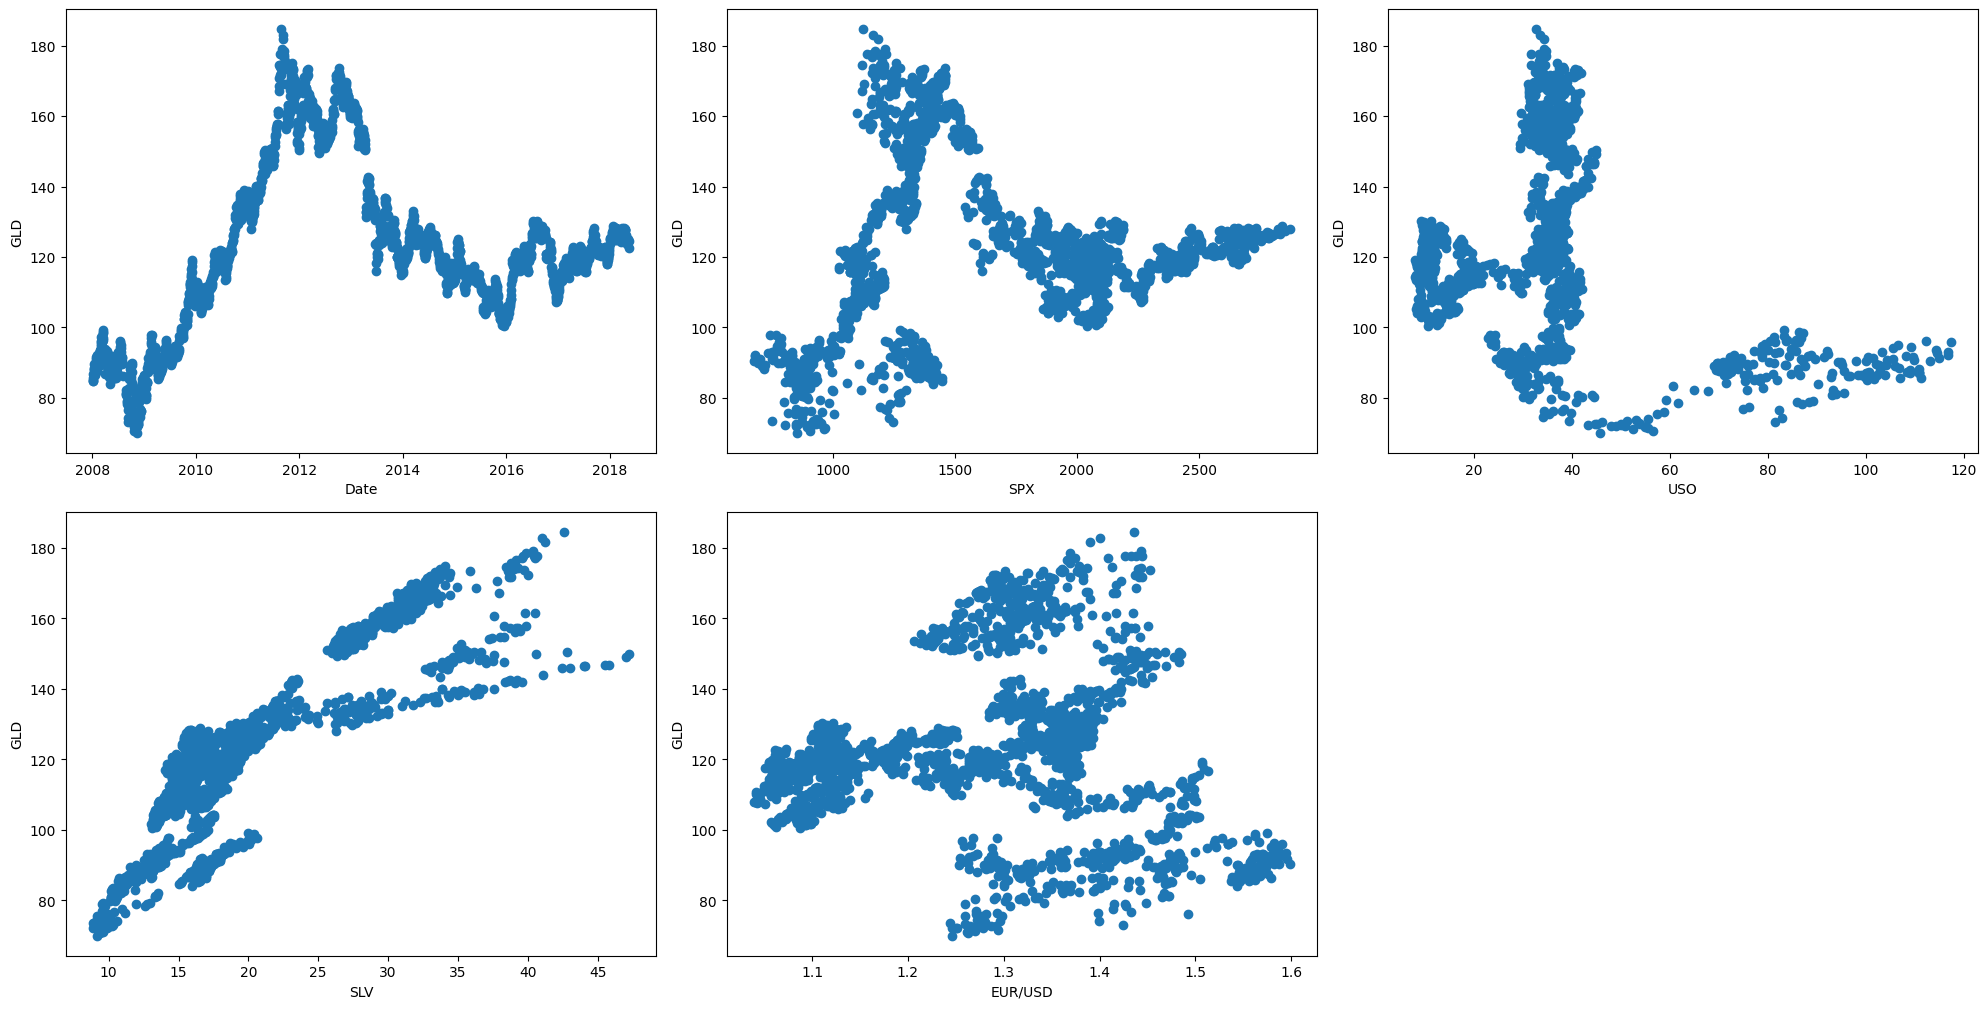

In [25]:
numerical_features = [col for col in df.columns if df[col].dtype != 'O' and col != 'GLD']
discrete_features = [col for col in numerical_features if len(df[col].unique()) < 25]
continuous_features = [col for col in numerical_features if col not in discrete_features]

# Scatter plots with 'GLD'

plt.figure(figsize=(20, 60))
plotnumber = 1

for feature in continuous_features:
    if df[feature].isnull().any() or df['GLD'].isnull().any():
        print(f"Skipping {feature} due to missing values.")
        continue
    ax = plt.subplot(12, 3, plotnumber)
    plt.scatter(df[feature], df['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plotnumber += 1

plt.tight_layout()
plt.show()

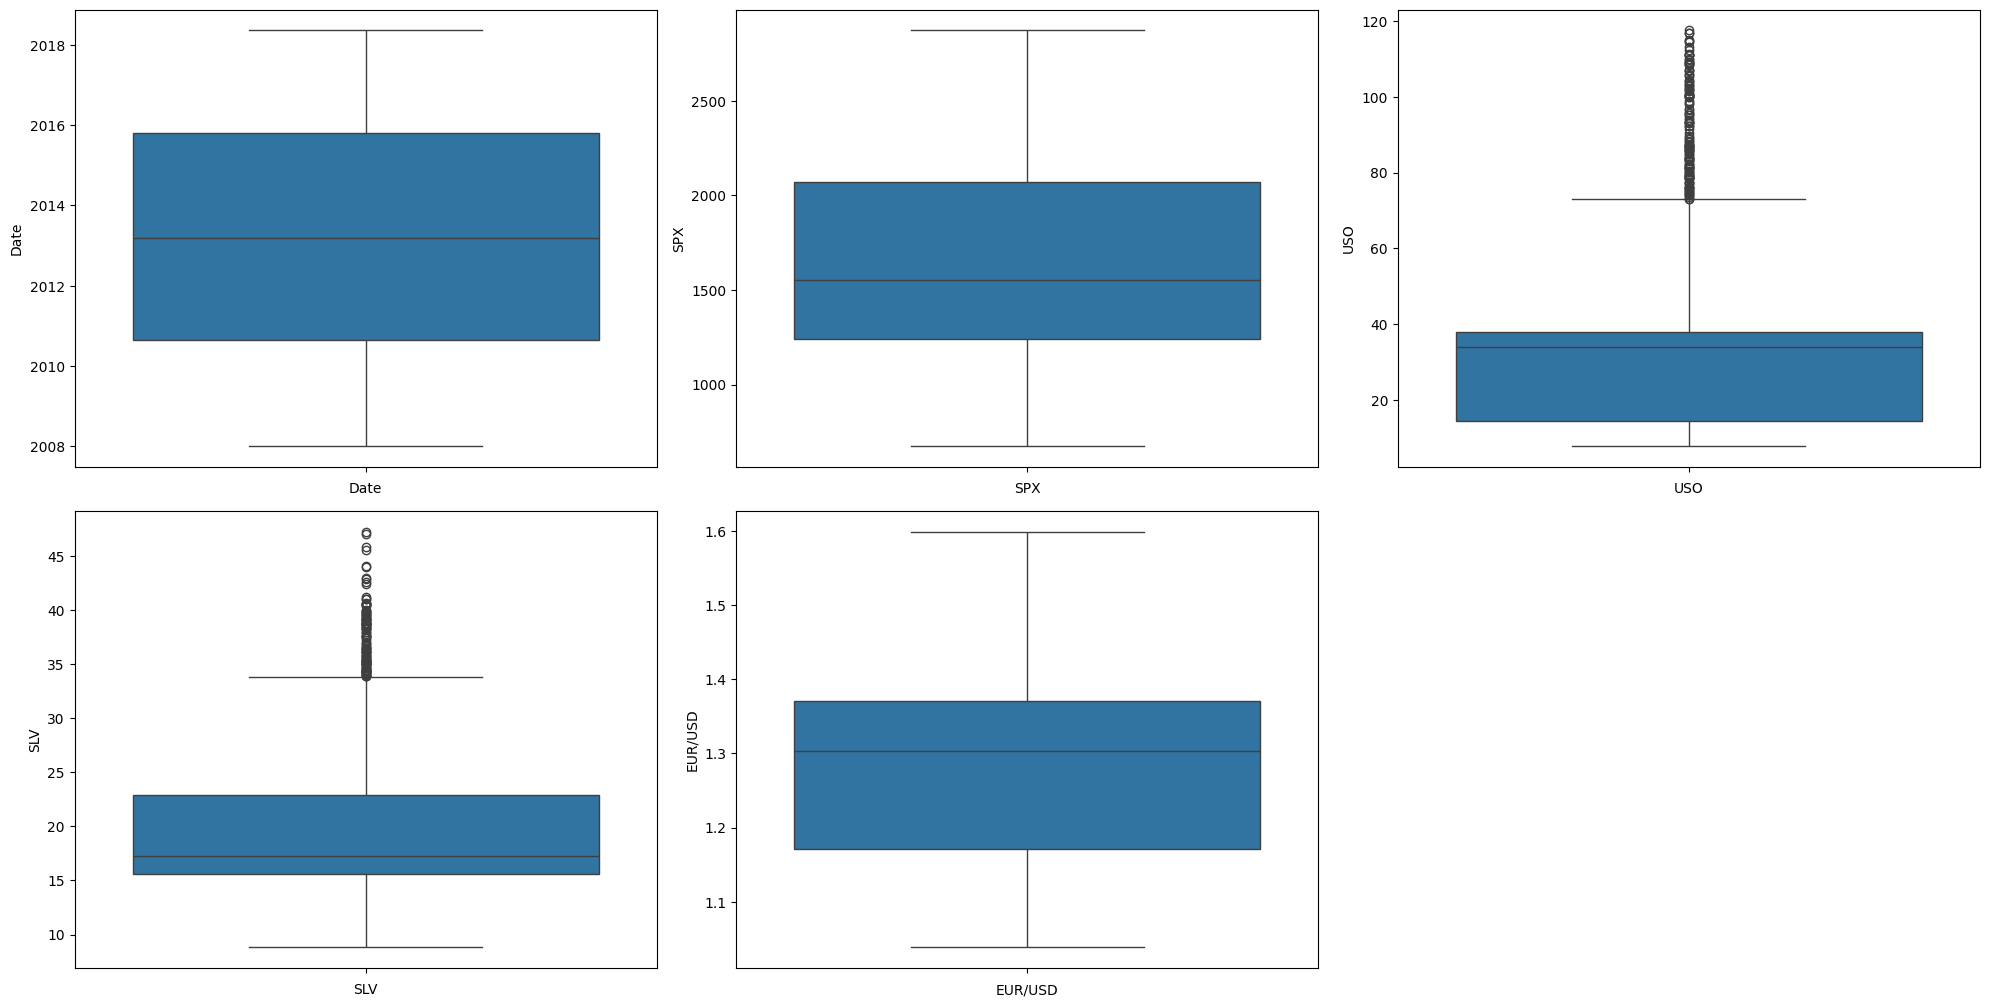

In [26]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20, 60),facecolor='white')
plotnumber = 1

for feature in numerical_features:
    if df[feature].isnull().any():
        print(f"Skipping {feature} due to missing values.")
        continue
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plotnumber += 1

plt.tight_layout()
plt.show()

<Axes: >

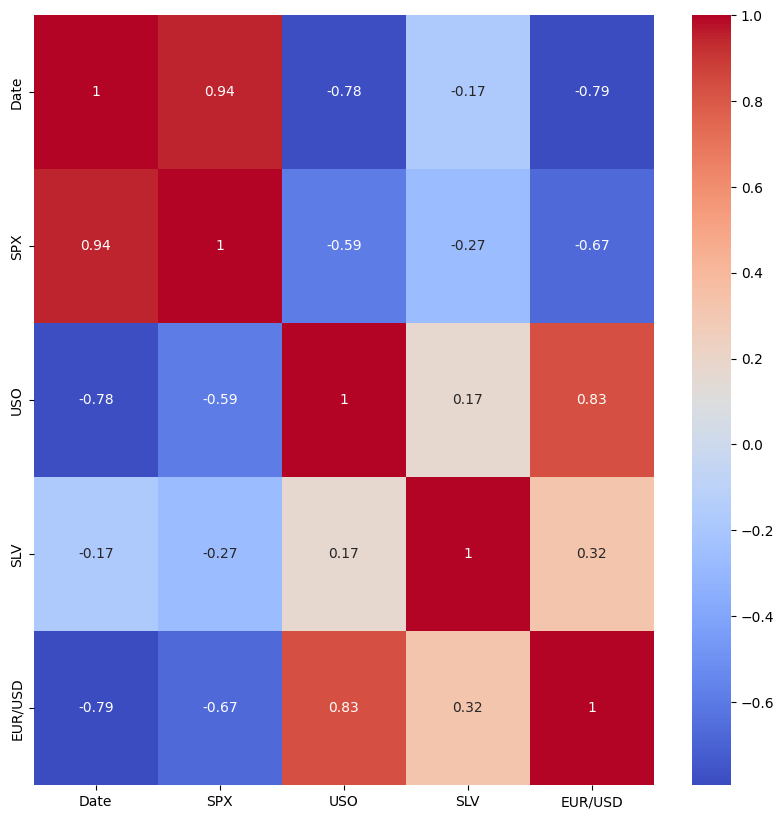

In [27]:
# check corelation with heatmap
plt.figure(figsize = (10,10))
sns.heatmap(df[continious_features].corr(),annot=True,cmap='coolwarm')

In [28]:
# Compute correlation matrix
#correlation_matrix = df[continious_features].corr()

# Sort the correlations with respect to 'GLD'
#sorted_correlations = correlation_matrix['GLD'].sort_values(ascending=False)

#print(sorted_correlations)
# Compute correlation matrix
correlation_matrix = df.corr()  # Directly compute correlation for all numerical columns

# Sort the correlations with respect to 'GLD'
sorted_correlations = correlation_matrix['GLD'].sort_values(ascending=False)

print(sorted_correlations)



GLD        1.000000
SLV        0.866632
Date       0.209118
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


FEATURE ENFINEERING

In [29]:
# Copying dataframes to new dataframes
df2 =df.copy()

In [30]:
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [31]:
df2.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018-05-08,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018-05-09,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018-05-10,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2018-05-14,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2018-05-16,2725.780029,122.543800,14.4058,15.4542,1.182033


In [32]:
# Drop data
df2.drop(['Date'],axis=1,inplace=True)

Splitting dataset into training and test data in 80:20 ratio.

In [33]:
x = df2.drop(['GLD'],axis=1)
y = df2['GLD']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
len(x_train)

1832

In [35]:
len(x_test)

458

In [36]:
x_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [37]:
## Algorithms
from sklearn.tree import DecisionTreeRegressor  # Decision Tree model for regression
from xgboost import XGBRegressor  # XGBoost model for better accuracy
from sklearn.ensemble import RandomForestRegressor  # Random Forest for ensemble learning

# Model selection techniques
from sklearn.model_selection import ShuffleSplit, GridSearchCV  # Used for splitting data & hyperparameter tuning


In [38]:
!pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
import xgboost
print("XGBoost installed successfully!")


XGBoost installed successfully!


In [41]:
def find_est_model_using_gridsearchcv(x, y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],   #random parameter values and below
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10, 50, 100, 130],        #random parameter values and below
                'criterion': ['squared_error'],
                'max_depth': range(2, 4),
                'max_features': ['sqrt', 'log2', None]
            }
        },
        'xgboost': {
            'model': XGBRegressor(),
            'params': {
                'learning_rate': [0.5, 0.1, 0.01, 0.001],      #random parameter values and below
                'max_depth': [2, 3],
                'n_estimators': [10, 50, 100, 200]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Applying model selection technique using gridSearchCV
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

        # Storing best score and best patameters

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [42]:
pd.set_option('display.max_colwidth', 100)
find_est_model_using_gridsearchcv(x, y)  # Ensure the function name matches



,model,best_score,best_params
0,decision_tree,0.982896,"{'criterion': 'squared_error', 'splitter': 'random'}"
1,random_forest,0.911253,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 130}"
2,xgboost,0.987293,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"


In [43]:
# Initialise the model
xg_model = XGBRegressor(learning_rate=0.5,max_depth=3,n_estimators=200)

In [44]:
xg_model.fit(x_train,y_train) #fror trainig the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
# finding score of the model
xg_model.score(x_test,y_test)

0.9847685874275643

In [46]:
#predicting thetest set
y_pred = xg_model.predict(x_test)

In [47]:
# predicted values
y_pred

array([169.24257 ,  82.672554, 115.83291 , 128.7338  , 120.68981 ,
       154.95808 , 150.11508 , 126.65612 , 118.40361 , 126.54028 ,
       115.1857  , 169.82155 , 143.76407 , 167.59834 , 116.182556,
       117.74236 , 137.40239 , 168.32079 , 152.55399 , 155.06413 ,
       156.63826 , 125.593636, 178.99747 , 154.66133 , 124.99562 ,
        95.903786,  73.64956 , 120.92895 , 118.98776 , 167.34872 ,
        87.25074 , 122.951256,  90.43017 , 118.52989 , 121.018364,
       138.4679  , 117.33224 , 114.77964 , 141.40999 , 107.5196  ,
       103.71184 ,  87.34779 , 126.33884 , 117.69657 , 155.69818 ,
       119.98044 , 109.26743 , 107.005974,  92.278465, 126.72903 ,
        74.26297 , 113.08902 , 121.10449 , 111.86181 , 118.81148 ,
       118.675804, 155.00035 , 170.60814 , 146.32542 ,  87.15864 ,
        95.35684 ,  87.34872 ,  90.2336  , 117.43808 , 126.92605 ,
       125.933266, 159.85771 , 122.26094 , 117.71072 ,  98.32712 ,
       168.02637 , 142.26883 , 135.69528 , 119.52772 , 122.952

In [48]:
# Actual values
y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

Taking Randomforest regressor

In [49]:
# splitting features and targets
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [50]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [51]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [53]:
regressor = RandomForestRegressor(n_estimators=100)

In [54]:
# training the model
regressor.fit(X_train,Y_train)
RandomForestRegressor()

RandomForestRegressor()

In [55]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [56]:
print(test_data_prediction)

[168.31059893  81.92749971 115.86890032 127.60670074 120.85930117
 154.70999816 150.34429855 126.08080025 117.50739866 125.99320044
 116.6506009  171.68450134 141.23529805 167.89299848 114.97889987
 117.69860056 139.79380248 170.16930118 159.3475031  160.89419956
 155.12290015 125.46520021 176.42210034 156.79040333 125.13410039
  93.71719983  77.20890039 120.56390006 119.12329923 167.41799945
  88.37900055 125.25490006  91.00620053 117.47660038 121.16369896
 137.02060062 115.48360131 115.05010062 147.52649901 107.28240092
 104.62610225  87.14919792 126.53030048 117.92709972 153.35869923
 119.63489994 108.40259988 108.2130979   93.08990049 127.0859977
  75.36820003 113.65599938 121.08899992 111.29249945 118.90829914
 120.37709937 159.32620032 165.58610136 146.99189726  86.21759891
  94.1098009   86.76319868  90.64860029 118.96920064 126.38090057
 127.56849984 170.17979948 122.26169945 117.32859912  98.46220028
 168.41110155 143.12609776 131.94290237 121.21770217 120.34129946
 119.647900

In [57]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R_squared error : ", error_score)

R_squared error :  0.989656407193022


In [58]:
Y_test = list(Y_test)

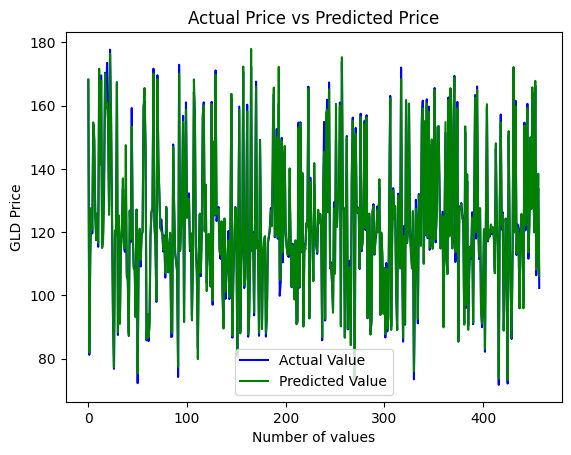

In [59]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Using line olot for comparison for actual and predicted values

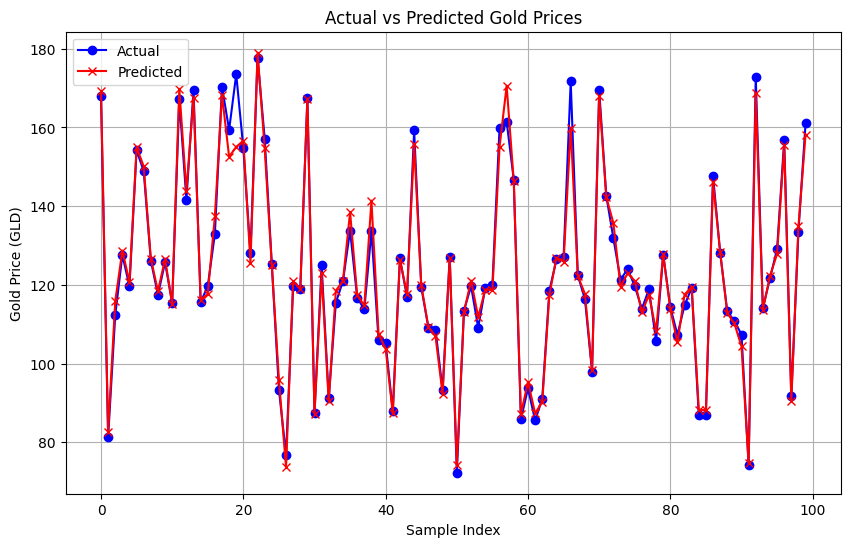

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual', color='blue', marker='o')
plt.plot(y_pred[:100], label='Predicted', color='red', marker='x')
plt.title("Actual vs Predicted Gold Prices")
plt.xlabel("Sample Index")
plt.ylabel("Gold Price (GLD)")
plt.legend()
plt.grid(True)
plt.show()


using Linear Regression for comaparision

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

# Training
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# predict
linear_y_pred = linear_model.predict(X_test)

# evaluating
print("Linear Regression - Mean Absolute Error (MAE):", mean_absolute_error(y_test, linear_y_pred))
print("Linear Regression - Mean Squared Error (MSE):", mean_squared_error(y_test, linear_y_pred))
print("Linear Regression - Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, linear_y_pred)))


Linear Regression - Mean Absolute Error (MAE): 5.911486735777764
Linear Regression - Mean Squared Error (MSE): 70.78890079721528
Linear Regression - Root Mean Squared Error (RMSE): 8.41361401522647


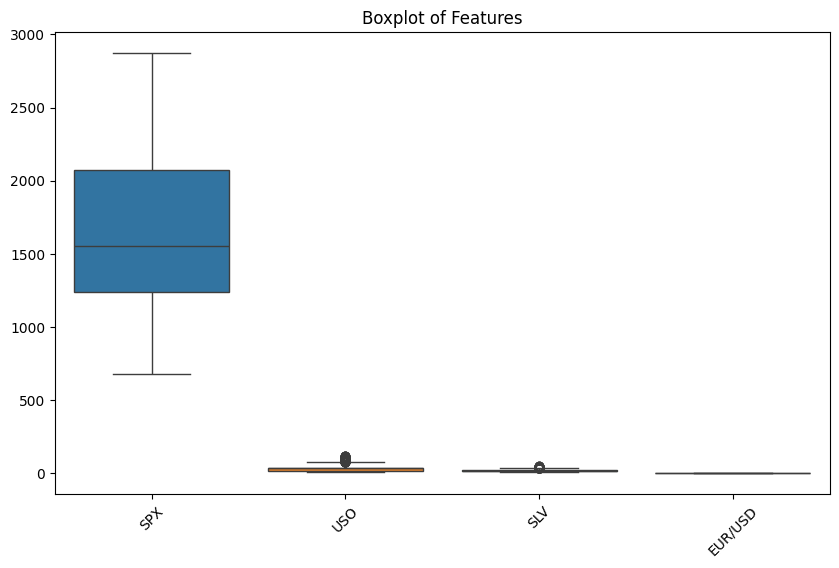

In [62]:
# Boxplot to Check Outliers in Features
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

In [63]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standarad_scaler = scaler.fit_transform(X)
standarad_scaler

array([[-0.39914541,  2.38880956, -0.6917197 ,  1.42975293],
       [-0.39914541,  2.38368652, -0.67691224,  1.45103511],
       [-0.46760428,  2.32938091, -0.69355301,  1.45864621],
       ...,
       [ 2.05926403, -0.89307824, -0.61274655, -0.69876145],
       [ 2.0728668 , -0.89461519, -0.63813078, -0.68838269],
       [ 2.06448555, -0.89329341, -0.65305106, -0.77266741]],
      shape=(2290, 4))

In [64]:
from sklearn.preprocessing import StandardScaler
def predict_gold_price(new_data):

    # Convert the new data to a NumPy array and reshape for a single prediction
    new_data = np.array(new_data).reshape(1, -1)
    
    # Standardize the input data using the fitted scaler
    new_data_scaled = scaler.transform(new_data)
    
    # Predict the gold price using the trained regressor
    predicted_price = regressor.predict(new_data_scaled)
    
    return predicted_price[0]  # Return the predicted gold price

# Example usage 
new_input = [1447.160034  ,78.470001 , 15.1800 , 1.471692]  
predicted_price = predict_gold_price(new_input)

print(f"Predicted Gold Price: {predicted_price:.2f}")

Predicted Gold Price: 77.33


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [65]:
import pickle

# Save the trained model
with open('gold_price_model.pkl', 'wb') as model_file:
    pickle.dump(regressor, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [66]:
# Load the model
with open('gold_price_model.pkl', 'rb') as model_file:
    regressor = pickle.load(model_file)

# Load the scaler
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pickle

# Example: Train a model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
regressor = RandomForestRegressor()
regressor.fit(X_scaled, y)

# Save the model and scaler
with open('gold_price_model.pkl', 'wb') as model_file:
    pickle.dump(regressor, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [68]:
import pickle
import numpy as np

# Load the saved model and scaler
with open('gold_price_model.pkl', 'rb') as model_file:
    regressor = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Function to make predictions
def predict_gold_price(features):
    features = np.array(features).reshape(1, -1)
    scaled_features = scaler.transform(features)
    prediction = regressor.predict(scaled_features)
    return prediction[0]
